### 로지스틱 회귀로 와인 분류하기

In [4]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [5]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
# wine-dataframe(어떤 type의 데이터, 크기가 얼마인지 정보 제공)
# Non-Null count: 누락된 값 확인 (만약 있으면 6496개가 나옴)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
# 평균, 표준편차, 최소, 최대값 등 정보 확인 (describe method)
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
# Pandas Dataframe를 numpy 배열로 봐꿈
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [11]:
# Data를 train, test set로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [16]:
# 학습한 계수, 절편 출력
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### 결정 트리
- sklearn.tree 모듈 아래 있음, 회귀: regressor, 분류: classifier
- 사용방법은 Logistic 회귀랑 동일

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


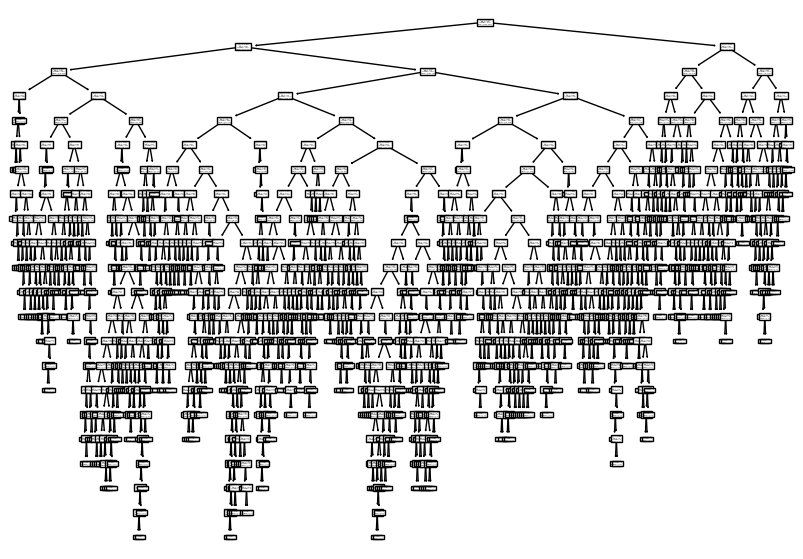

In [18]:
# 결정트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 맨위의 node(root node), 맨 아래의 node(leaf node)
- 끝까지 오면 음수,양수 인지 구분 가능(red,white wine 인지)
- 마지막 leaf node에 있는 예측값이 새로운 sample x에 대한 예측값.
- 분류인 경우 최근접 이웃과 비슷, 마지막 leaf node에 들어있는 sample들중 다수의 class가 예측 클래스
- 회귀는 마지막 leaf node의 sample들의 target값의 평균이 x sample의 예측값.

### 결정 트리 분석

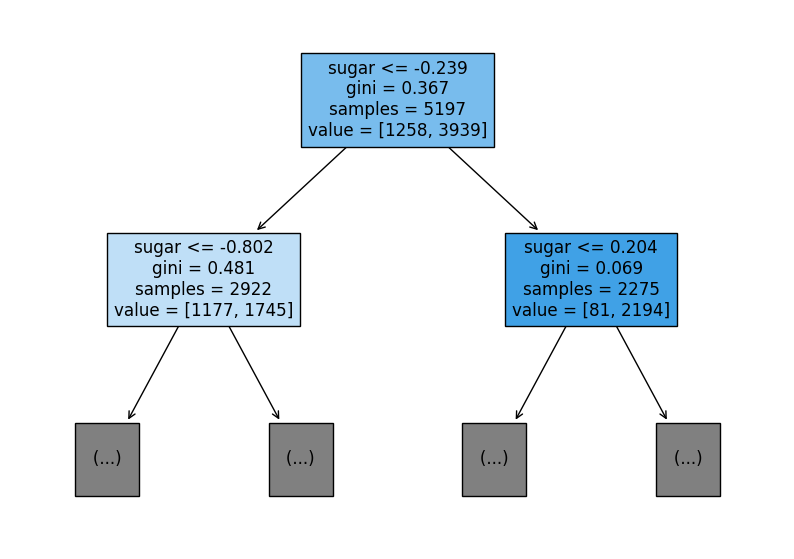

In [22]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 양수(파란색), 음수(빨간색)으로 표현
- 테스트 조건(sugar), 불순도 (gini), 총 샘플수(samples), 클래스별 샘플 수(value)
- leaf node 나누는 기준:sugar

### 지니 불순도 - 가지치기

In [24]:
# Logistic 회귀는 선형함수 가중치를 학습하기 위하여 특성의 scale을 맞춤.
# 결정 Tree는 선형함수 훈련하는 알고리즘이 아니기 때문에 특성의 scale를 조정할 필요 없음.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


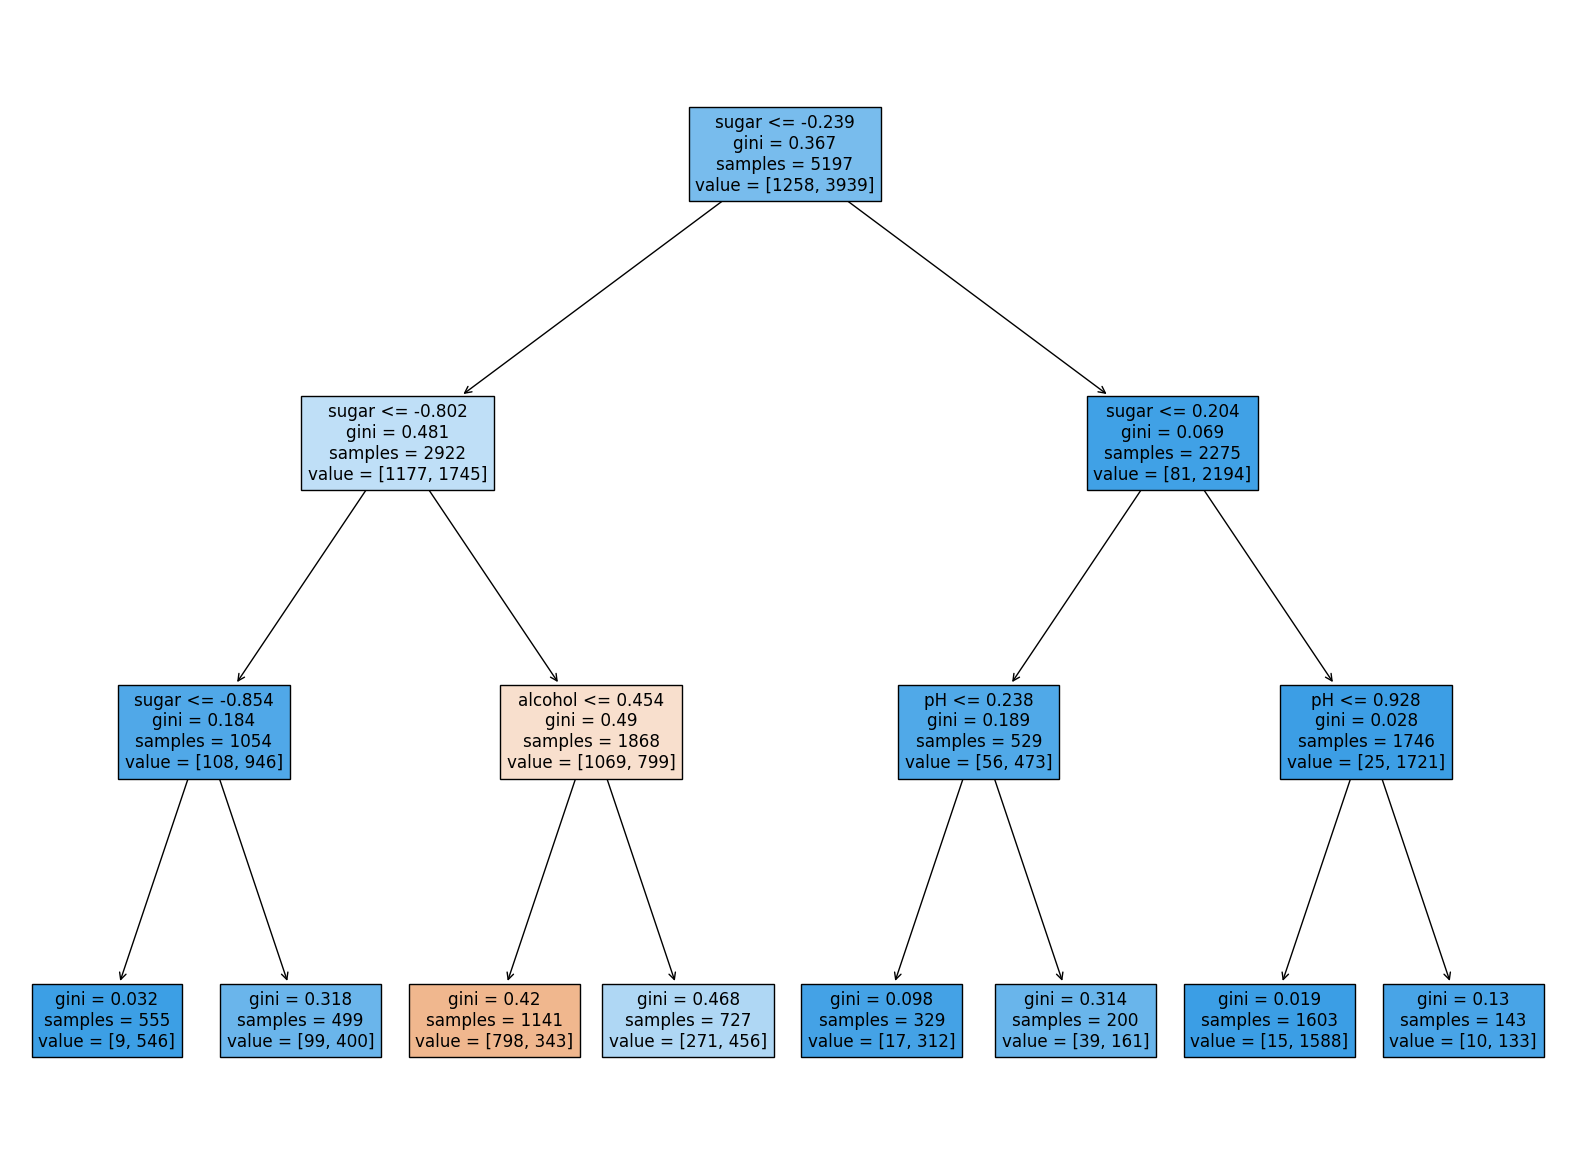

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [27]:
# 특성 중요도 출력. 0.868로 sugar의 값이 가장 높으므로 가장 중요하게 사용되는 특성이라는걸 알수 있음
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
